In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [49]:
# Load the data
df = pd.read_csv("../data/merged.csv", parse_dates=["time"], index_col="time")

# Feature engineering: Extracting time-related features
df["hour"] = df.index.hour
df["minute"] = df.index.minute
df["day_of_week"] = df.index.dayofweek
df["day_of_month"] = df.index.day
df["month"] = df.index.month
df["season"] = (df.index.month % 12 + 3) // 3  # Calculates the season (1: winter, 2: spring, 3: summer, 4: autumn)

# Take the mean of "oxygen_a" and "oxygen_b" and create a new feature "mean_oxygen"
df["mean_oxygen"] = df[["oxygen_a", "oxygen_b"]].mean(axis=1)

# Define input features and target variable
features = ["phosphate", "nitrate", "ammonium", "hour", "minute", "day_of_week", "day_of_month", "month", "season"]  # Exclude "mean_oxygen" as a feature
target = "mean_oxygen"  # Target variable

# Shift the target variable to create a column for the next time step
df["next_mean_oxygen"] = df[target].shift(-1)

# Drop the last row (since there's no target for it)
df = df.dropna()

# Train-test split
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(train_data[features], train_data["next_mean_oxygen"])
lr_predictions = lr_model.predict(test_data[features])


# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(train_data[features], train_data["next_mean_oxygen"])
dt_predictions = dt_model.predict(test_data[features])

In [50]:
print("Linear Regression MSE:", mean_squared_error(test_data["next_mean_oxygen"], lr_predictions))
print("Linear Regression MAE:", mean_absolute_error(test_data["next_mean_oxygen"], lr_predictions))
print("Linear Regression RMSE:", mean_squared_error(test_data["next_mean_oxygen"], lr_predictions, squared=False))

print("Decision Tree MSE:", mean_squared_error(test_data["next_mean_oxygen"], dt_predictions))
print("Decision Tree MAE:", mean_absolute_error(test_data["next_mean_oxygen"], dt_predictions))
print("Decicion Tree RMSE:", mean_squared_error(test_data["next_mean_oxygen"], dt_predictions, squared=False))

Linear Regression MSE: 0.32648092594201644
Linear Regression MAE: 0.47158543958563753
Linear Regression RMSE: 0.571385094259569
Decision Tree MSE: 0.5391933190270644
Decision Tree MAE: 0.4955033200152207
Decicion Tree RMSE: 0.7342978408160168


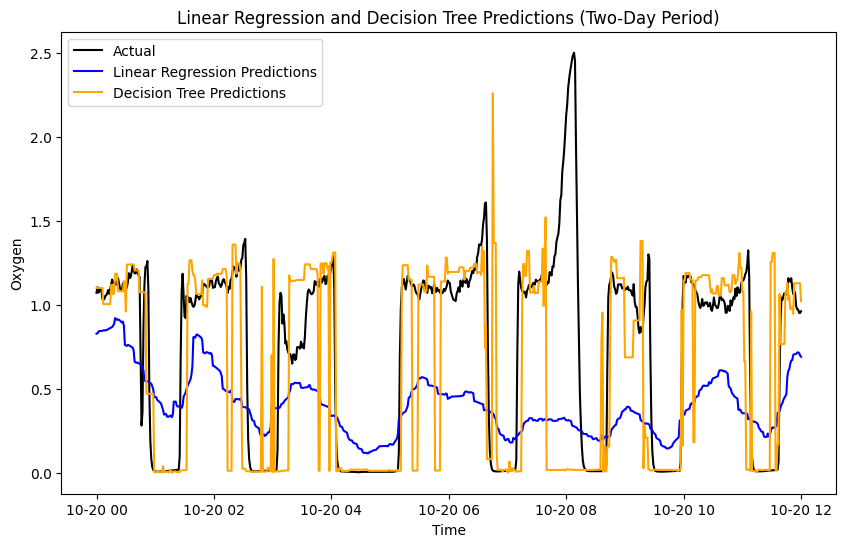

In [51]:
import matplotlib.pyplot as plt

# Select a specific time range (e.g., two days)
start_date = "2021-10-20 00:00:00"
# end_date = "2021-10-20 23:59:59"
end_date = "2021-10-20 12:00:00"
filtered_test_data = test_data[(test_data.index >= start_date) & (test_data.index <= end_date)]

# Linear Regression predictions for the selected time range
lr_predictions_subset = lr_predictions[(test_data.index >= start_date) & (test_data.index <= end_date)]

# Decision Tree predictions for the selected time range
dt_predictions_subset = dt_predictions[(test_data.index >= start_date) & (test_data.index <= end_date)]

# Visualize predictions for the selected time range with a simple line graph
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(filtered_test_data.index, filtered_test_data["next_mean_oxygen"], label="Actual", color="black")

# Plot Linear Regression predictions
plt.plot(filtered_test_data.index, lr_predictions_subset, label="Linear Regression Predictions", color="blue")

# Plot Decision Tree predictions
plt.plot(filtered_test_data.index, dt_predictions_subset, label="Decision Tree Predictions", color="orange")

plt.title("Linear Regression and Decision Tree Predictions (Two-Day Period)")
plt.xlabel("Time")
plt.ylabel("Oxygen")
plt.legend()

plt.show()
